In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
data = yf.download("^NSEI", start="2020-01-01", end="2025-01-01")

C:\Users\Harsh\AppData\Local\Temp\ipykernel_4952\3600525556.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^NSEI", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [4]:
data.columns =[ 'Close', 'High', 'Low', 'Open', 'Volume']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2020-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1237 non-null   float64
 1   High    1237 non-null   float64
 2   Low     1237 non-null   float64
 3   Open    1237 non-null   float64
 4   Volume  1237 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.0 KB


In [6]:
data.describe()

,Close,High,Low,Open,Volume
count,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03
mean,17340.238604,17434.598660,17239.508074,17351.181081,3.858669e+05
std,4189.651140,4192.195436,4187.405952,4189.222767,2.057492e+05
min,7610.250000,8036.950195,7511.100098,7735.149902,0.000000e+00
25%,14850.750000,14918.450195,14707.000000,14837.700195,2.496000e+05
50%,17522.449219,17610.449219,17405.250000,17519.400391,3.104000e+05
75%,19653.500000,19699.349609,19554.000000,19627.199219,4.950000e+05
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


In [7]:
data = data[data['Volume']!=0.000000e+00]

In [8]:
df = data.copy()

<Axes: >

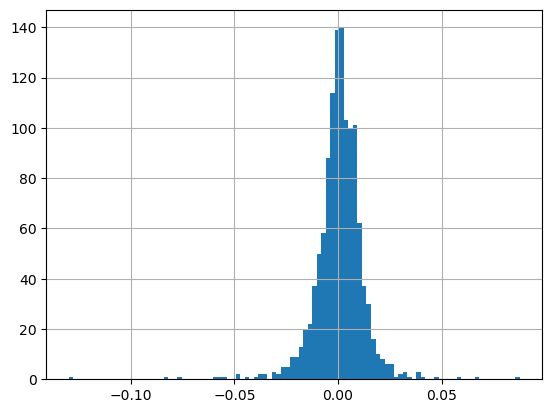

In [9]:
df['ret1'] = df['Close'].pct_change()
df['ret1'].hist(bins=100)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

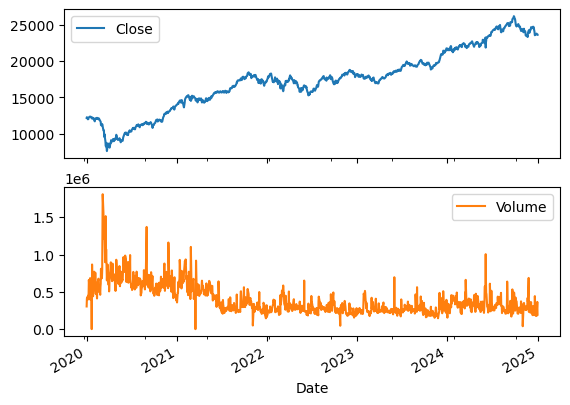

In [10]:
df[['Close','Volume']].plot(subplots=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.describe()

,Close,High,Low,Open,Volume,ret1
count,1222.000000,1222.000000,1222.000000,1222.000000,1.222000e+03,1222.000000
mean,17333.539284,17428.331828,17232.463288,17344.738584,3.903545e+05,0.000617
std,4185.936671,4188.683942,4183.887457,4185.721363,2.027805e+05,0.012122
min,7610.250000,8036.950195,7511.100098,7735.149902,1.000000e+02,-0.129805
25%,14854.199951,14918.700195,14708.937500,14842.150146,2.512250e+05,-0.004385
50%,17523.774414,17614.125000,17405.400391,17521.900391,3.120500e+05,0.001046
75%,19644.113281,19695.225098,19550.800781,19622.100098,4.982500e+05,0.006931
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06,0.087632


In [13]:
df['sma_20']= df['Close'].rolling(window=20).mean()
df['ema_12']= df['Close'].ewm(span=12, adjust=False).mean()
df['ema_26'] = df['Close'].ewm(span=26, adjust=False).mean()

In [14]:
df['macd_hist']= (df['ema_12']-df['ema_26']) -((df['ema_12']-df['ema_26']).ewm(span=9 , adjust=False).mean())

In [15]:
import pandas_ta as ta

In [16]:
df['rsi_14'] = ta.rsi(df['Close'], length= 14)
df['roc_10'] = df['Close'].pct_change(10)*100

In [17]:
ma_20 = df['Close'].rolling(window=20).mean()
std_20 = df['Close'].rolling(window=20).std()
bb_upper = ma_20 + 2*std_20
bb_lower = ma_20 - 2*std_20


In [18]:
df['bb_width'] = (bb_upper - bb_lower)/ma_20

In [19]:
#atr 14
h_l = df['High'] - df['Low']
h_pc= (df['High']- df['Close'].shift(1)).abs()
l_pc =  (df['Low']- df['Close'].shift(1)).abs()
tr = pd.concat([h_l, h_pc, l_pc], axis =1 ).max(axis=1)
df['atr_14'] = tr.rolling(window =14).mean()

In [20]:
df['obv'] = (np.sign(df['Close'].diff())*df['Volume']).fillna(0).cumsum()

In [21]:
tp= (df['High']+df['Low']+df['Close'])/3
df['vwap'] = (tp * df['Volume']).cumsum() / df['Volume'].cumsum()

In [22]:
df.head()

,Close,High,Low,Open,Volume,ret1,sma_20,ema_12,ema_26,macd_hist,rsi_14,roc_10,bb_width,atr_14,obv,vwap
Date,,,,,,,,,,,,,,,,
2020-01-02,12282.200195,12289.900391,12195.250000,12198.549805,407700,0.008184,NaN,12282.200195,12282.200195,0.000000,NaN,NaN,NaN,NaN,0.0,12255.783529
2020-01-03,12226.650391,12265.599609,12191.349609,12261.099609,428800,-0.004523,NaN,12273.654072,12278.085395,-3.545059,0.000000,NaN,NaN,NaN,-428800.0,12241.472941
2020-01-06,11993.049805,12179.099609,11974.200195,12170.599609,396500,-0.019106,NaN,12230.484184,12256.971648,-20.480959,0.000000,NaN,NaN,NaN,-825300.0,12179.509047
2020-01-07,12052.950195,12152.150391,12005.349609,12079.099609,447800,0.004995,NaN,12203.171263,12241.858947,-26.144944,6.322737,NaN,NaN,NaN,-377500.0,12150.373545
2020-01-08,12025.349609,12044.950195,11929.599609,11939.099609,446000,-0.002290,NaN,12175.814085,12225.821219,-29.971514,6.130398,NaN,NaN,NaN,-823500.0,12118.832472


In [23]:
df['ret_1'] = df['Close'].pct_change()
for lag in [1,2,3,5]:
    df[f'return_lag_{lag}'] = df['ret_1'].shift(lag)

In [24]:
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1203 entries, 2020-01-29 to 2024-12-31
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1203 non-null   float64
 1   High          1203 non-null   float64
 2   Low           1203 non-null   float64
 3   Open          1203 non-null   float64
 4   Volume        1203 non-null   int64  
 5   ret1          1203 non-null   float64
 6   sma_20        1203 non-null   float64
 7   ema_12        1203 non-null   float64
 8   ema_26        1203 non-null   float64
 9   macd_hist     1203 non-null   float64
 10  rsi_14        1203 non-null   float64
 11  roc_10        1203 non-null   float64
 12  bb_width      1203 non-null   float64
 13  atr_14        1203 non-null   float64
 14  obv           1203 non-null   float64
 15  vwap          1203 non-null   float64
 16  ret_1         1203 non-null   float64
 17  return_lag_1  1203 non-null   float64
 18  return_lag

In [26]:
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1203 entries, 2020-01-29 to 2024-12-31
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             1203 non-null   float64
 1   High              1203 non-null   float64
 2   Low               1203 non-null   float64
 3   Open              1203 non-null   float64
 4   Volume            1203 non-null   int64  
 5   ret1              1203 non-null   float64
 6   sma_20            1203 non-null   float64
 7   ema_12            1203 non-null   float64
 8   ema_26            1203 non-null   float64
 9   macd_hist         1203 non-null   float64
 10  rsi_14            1203 non-null   float64
 11  roc_10            1203 non-null   float64
 12  bb_width          1203 non-null   float64
 13  atr_14            1203 non-null   float64
 14  obv               1203 non-null   float64
 15  vwap              1203 non-null   float64
 16  ret_1             1203 n

In [44]:
#Features all cols except target
x = df.drop(columns=['target','High', 'Low', 'Open','cum_index_ret', 'cum_strategy_ret'])
y = df['target']

In [45]:
split_idx = int(len(df) * 0.8)

In [46]:
x_train = x.iloc[:split_idx]
y_train = y.iloc[:split_idx]
x_test = x.iloc[split_idx:]
y_test = y.iloc[split_idx:]

In [55]:
print("Train samples:", x_train.shape[0])
print("Test samples:", y_test.shape[0])

Train samples: 962
Test samples: 241


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state = 42)
rf.fit(x_train, y_train)
y_pred_random = rf.predict(x_test)

In [61]:

print("r2_score", r2_score(y_test,y_pred_random))

NameError: name 'r2_score' is not defined

In [48]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

D:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:31:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [49]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.46473029045643155
XGBoost F1 Score: 0.6006191950464397


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=0.1, gamma='scale', probability=True, random_state=42))
])

pipe_svm.fit(x_train, y_train)
y_pred_svm = pipe_svm.predict(x_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm))

SVM Accuracy: 0.5435684647302904
SVM F1 Score: 0.7043010752688172


In [51]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(n_splits=5)
param_grid_svm = {'svc__C':[0.1,1,10], 'svc__gamma':['scale','auto']}
gs_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=tscv, scoring='f1')
gs_svm.fit(x_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(C=0.1, probability=True,
                                            random_state=42))]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto']},
             scoring='f1')

<Axes: title={'center': 'Strategy vs Index Performance'}, xlabel='Date'>

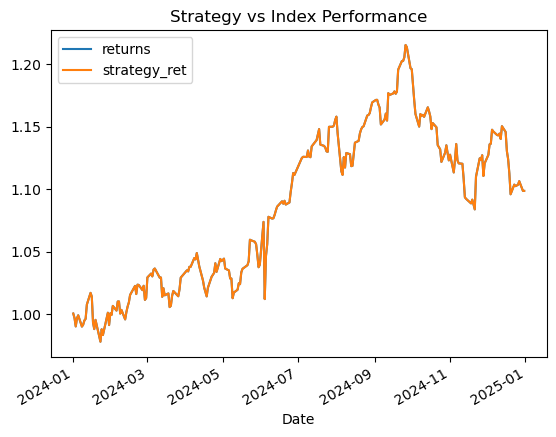

In [58]:
test = x_test.copy()
test['y_true'] = y_test
test['y_pred'] = y_pred_svm

test['returns'] = df.loc[x_test.index, 'ret_1']  # daily returns

# Strategy: take return only when model predicts up
test['strategy_ret'] = test['returns'] * test['y_pred']

# Cumulative performance
test[['returns','strategy_ret']].cumsum().apply(np.exp).plot(title='Strategy vs Index Performance')

<Axes: title={'center': 'Strategy vs Index Performance'}, xlabel='Date'>

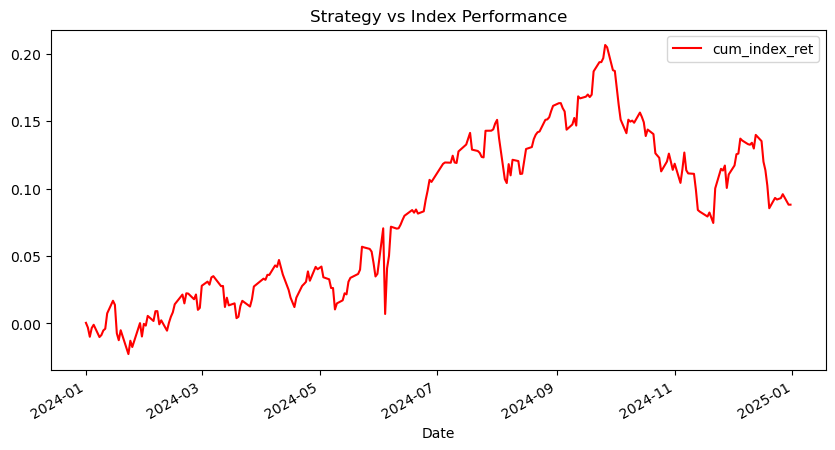

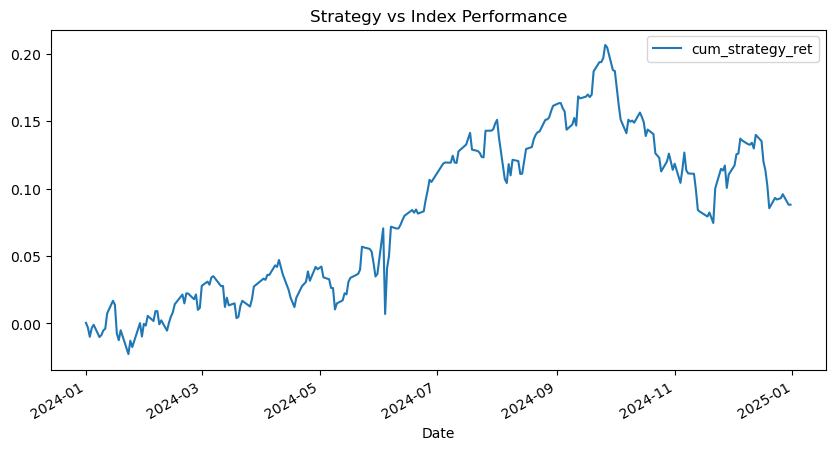

In [37]:
df['cum_index_ret'] = (1 + test['returns']).cumprod() - 1
df['cum_strategy_ret'] = (1 + test['strategy_ret']).cumprod() - 1


df[['cum_index_ret']].plot(figsize=(10,5), title='Strategy vs Index Performance', color ='r')
df[['cum_strategy_ret']].plot(figsize=(10,5), title='Strategy vs Index Performance')

In [38]:
sharpe = (test['strategy_ret'].mean() / test['strategy_ret'].std()) * np.sqrt(252)
print("Sharpe Ratio:", sharpe)

Sharpe Ratio: 0.6909384916344403


In [39]:
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [40]:
df['cum_index_ret'] = (1 + test['returns']).cumprod() - 1
df['cum_strategy_ret'] = (1 + test['strategy_ret']).cumprod() - 1

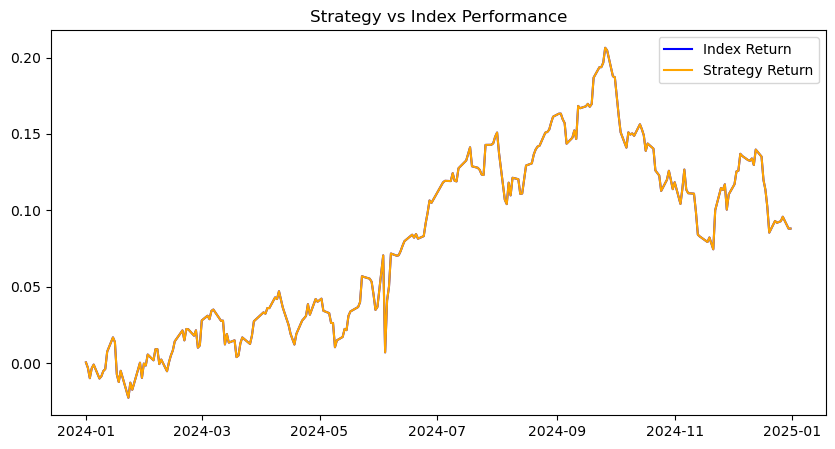

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df.index, df['cum_index_ret'], label='Index Return', color='blue')
plt.plot(df.index, df['cum_strategy_ret'], label='Strategy Return', color='orange')
plt.title('Strategy vs Index Performance')
plt.legend()
plt.show()

In [42]:
print(df['cum_index_ret'].corr(df['cum_strategy_ret']))
print((df['cum_index_ret'] - df['cum_strategy_ret']).describe())

0.9999999999999999
count    241.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64


ValueError: x and y must have same first dimension, but have shapes (1203,) and (241,)

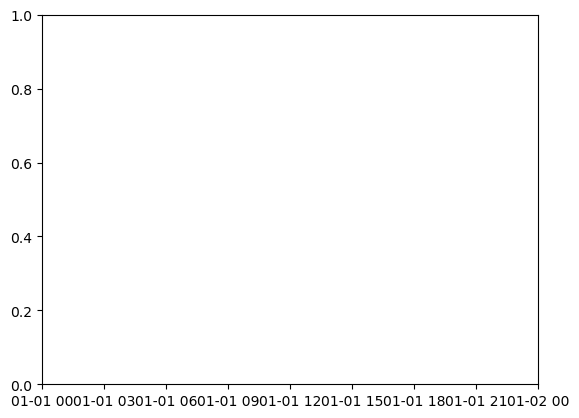

In [54]:
plt.plot(df.index, test['returns'], label='Index Return', color='blue', alpha=0.7)
plt.plot(df.index, test['strategy_ret'], label='Strategy Return', color='orange', alpha=0.7)